# <center>LUNG CANCER PREDICTION<center>

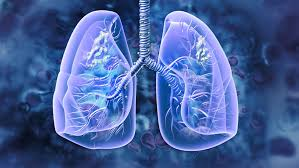

<b>Research Questions<b>

1) What are the highest and smallest determining factor for lung cancer?

2) What age is someone likely to have lung cancer. Given that the top 5 features from the feature importance plot is true and others are false. The gender column can be varied. Therefore there should be results for both genders

#### Importing libraries

In [476]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',50)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.inspection import permutation_importance

In [477]:
#importing lung cancer dataset
lungs = pd.read_csv(r"C:\Users\DELL\Downloads\Lung.csv")

In [478]:
lungs.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
181,F,74,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
174,M,72,1,2,1,2,1,2,2,2,2,2,2,1,2,YES
260,F,59,1,2,2,2,2,2,1,2,2,1,1,1,1,YES
130,F,51,2,2,2,2,1,2,1,1,1,1,2,2,1,YES
193,F,64,1,1,1,2,2,1,1,1,1,1,1,1,1,YES
155,M,75,2,2,2,2,2,1,1,1,1,1,1,1,2,YES
293,F,56,2,2,2,1,1,2,2,1,1,1,2,1,2,YES
287,F,51,2,2,2,2,1,2,1,1,1,1,2,2,1,YES
186,F,72,1,2,2,2,2,2,1,1,1,1,1,1,1,YES
289,F,61,2,1,1,1,2,2,2,1,1,1,2,1,1,YES


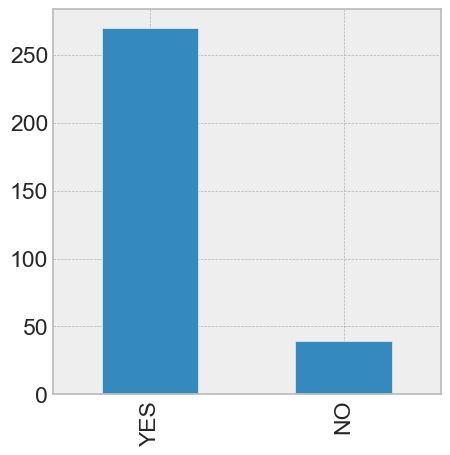

In [479]:
lungs['LUNG_CANCER'].value_counts().plot(kind = 'bar');

In [480]:
#The dataset is wide and it is short but it still could be used to create a predictive model. 
#As long as it is able to generalize, then we are good to go.
lungs.shape

(309, 16)

In [481]:
# Calculating sum of null values in the data set
lungs.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [482]:
#checking dtypes. This gives an overview of the datatypes, amount of data and columns present.

lungs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [483]:
lungs['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

In [484]:
cols = lungs.columns.tolist()
cols

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

In [485]:
cols.remove('AGE')
cat_cols = cols

In [486]:
cat_cols

['GENDER',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

In [487]:
#Calculating the statistics of the data
lungs.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [488]:
lungs.duplicated().any()

True

There are duplicated values in this dataset, this is not good for the ml model because you do not want it to overfit on duplicate data. The best thing is to remove such duplicate data.

In [489]:
lungs.duplicated().sum()

33

In [490]:
#Removing the 33 duplicate data

In [491]:
lungs.drop_duplicates(inplace=True)

# lungs1 = lungs.drop_duplicates()

In [492]:
#Encoding the columns 'Lung cancer and gender' because they are object types. To create ml models, we need to feed the model
# with numbers i.e ints or floats or other dtypes in this family

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
lungs['LUNG_CANCER']=encoder.fit_transform(lungs['LUNG_CANCER'])
lungs['GENDER']=encoder.fit_transform(lungs['GENDER'])
lungs.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Visualization 

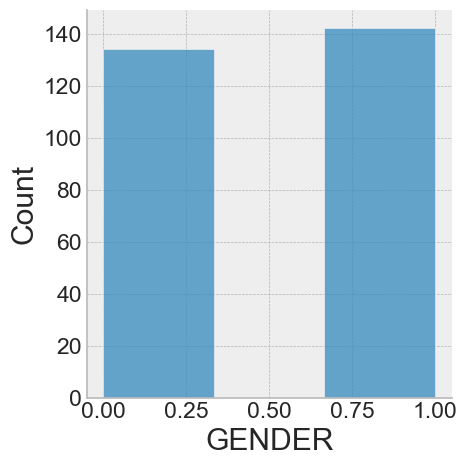

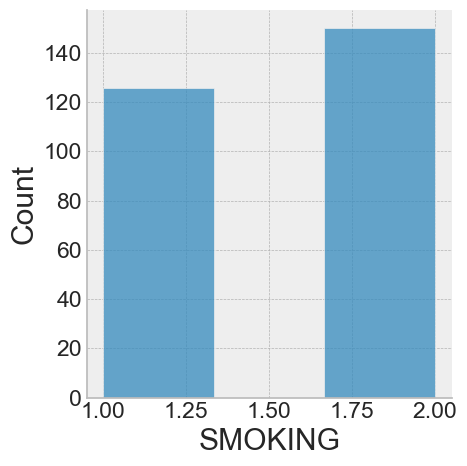

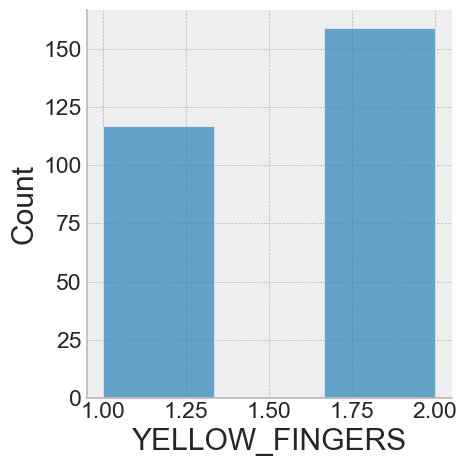

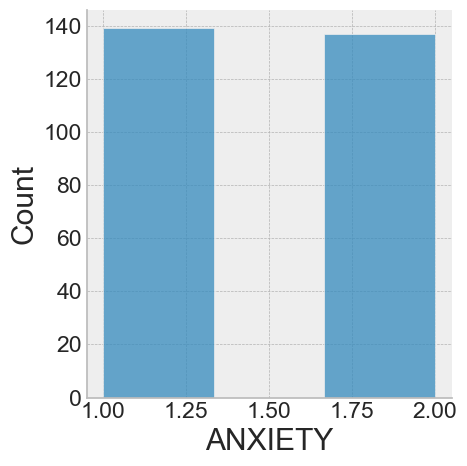

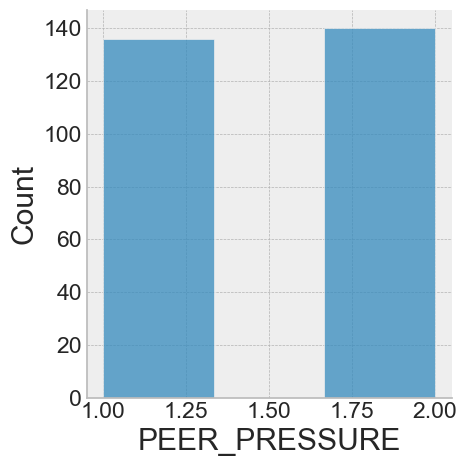

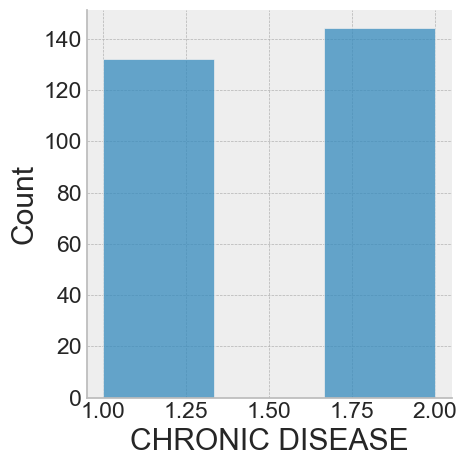

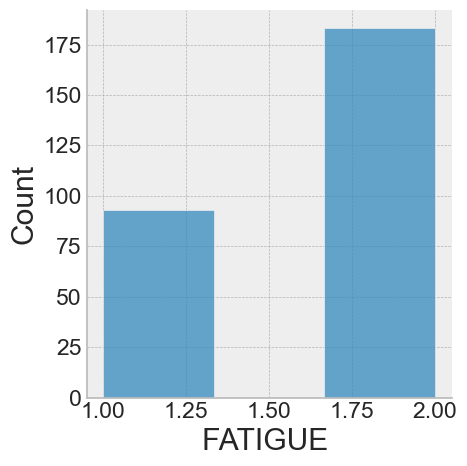

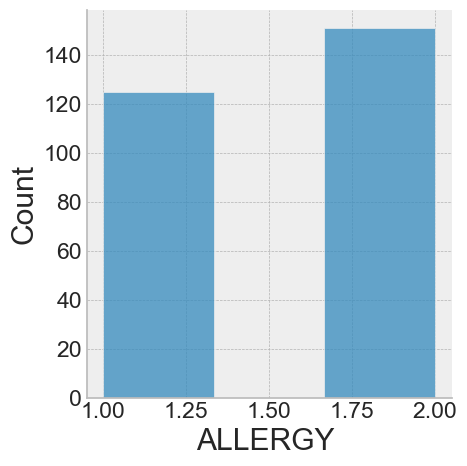

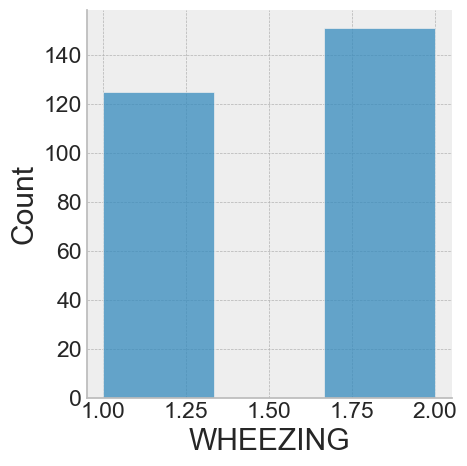

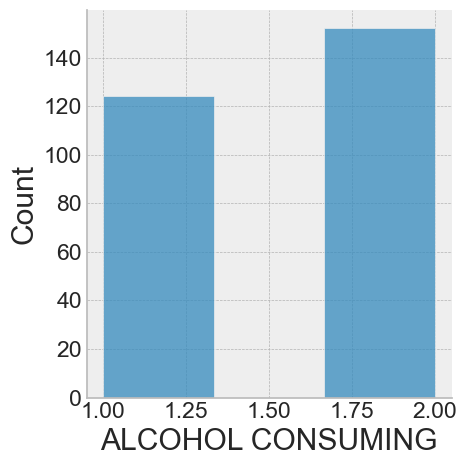

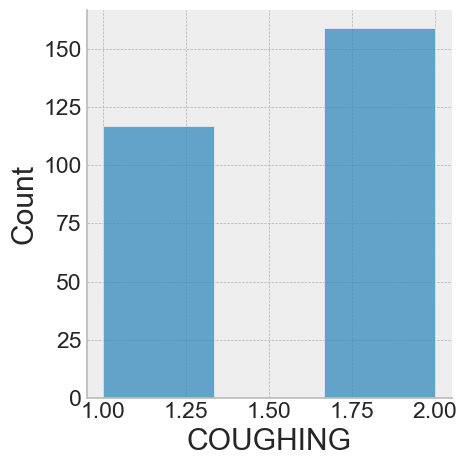

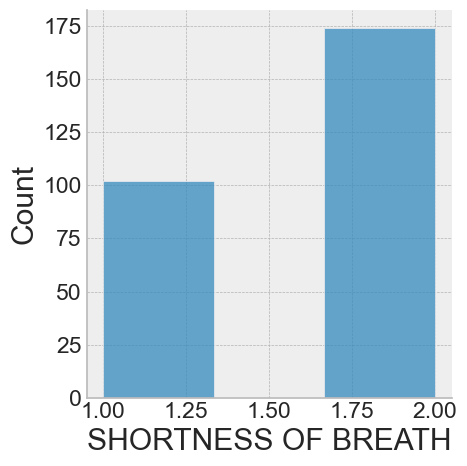

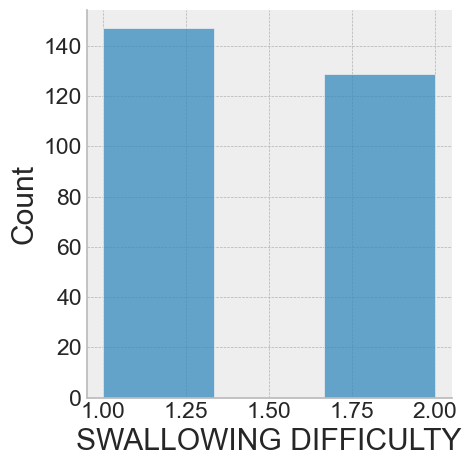

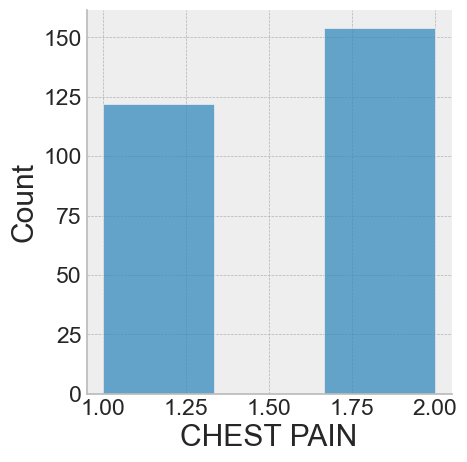

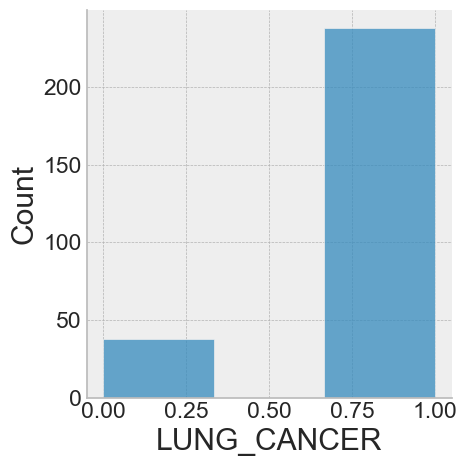

In [493]:
plt.style.use('bmh')

#Visualizing the histogram of all features in the dataset
for i in cols:
    sns.displot(lungs[i],bins = 3)
    
plt.show()

In [ ]:
#The age distribution did not show in the above plot but it can be visualized alone below

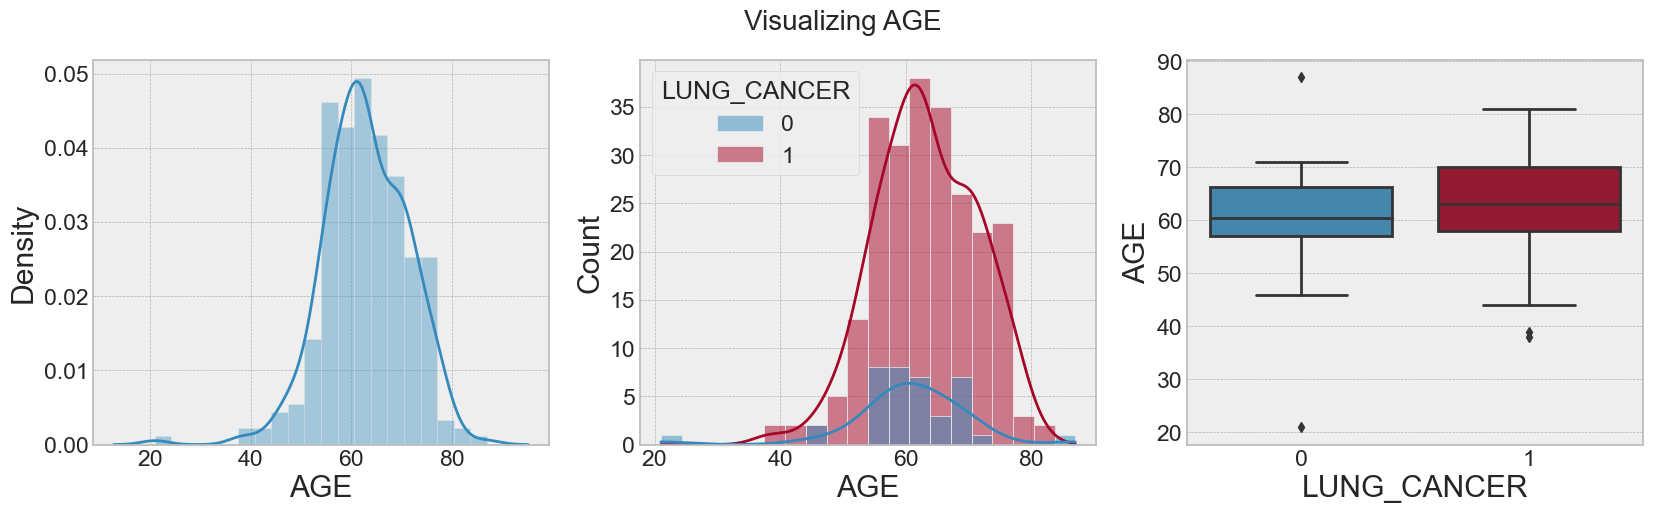

In [496]:
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(lungs['AGE'],ax=ax[0])
sns.histplot(data =lungs,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=lungs['LUNG_CANCER'],y=lungs['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE",size=20)
plt.show()

In [ ]:
#Now let's visualize all the categorical columns i.e columns containing discrete values such as 1 & 0, 1 & 2, 1, 2 & 3, etc

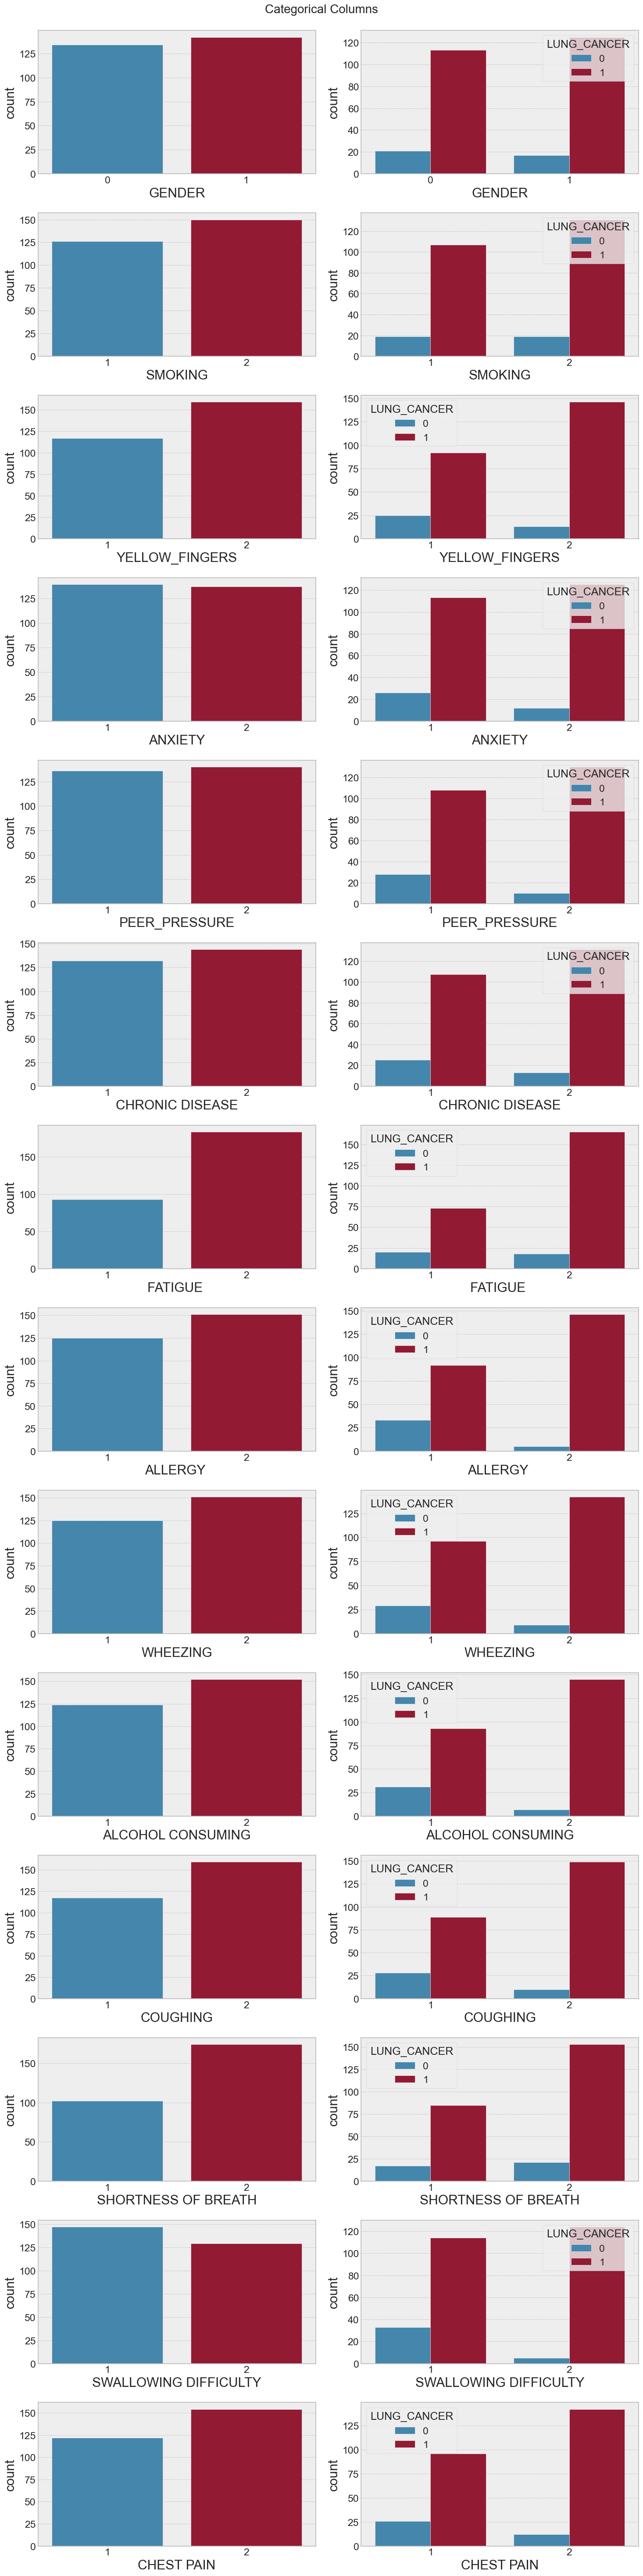

In [497]:
fig,ax = plt.subplots(14,2,figsize=(15,60))
for index,i in enumerate(cat_cols[:-1]):
    sns.countplot(data=lungs,x=i,ax=ax[index,0])
    sns.countplot(data=lungs,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.suptitle("Categorical Columns",fontsize=20)
plt.show()

The figure below shows the relationship between age and each categorical column with lung cancer as a hue or column for contrasting the relationship.

We can find a number of outliers in the dataset. This is okay because in reality, issues like this occur. We could remove them or leave them so the model can learn to predict on some values it has not seen before. 

If the outliers are too far from the mean or upper and lower points, they can be discarded.

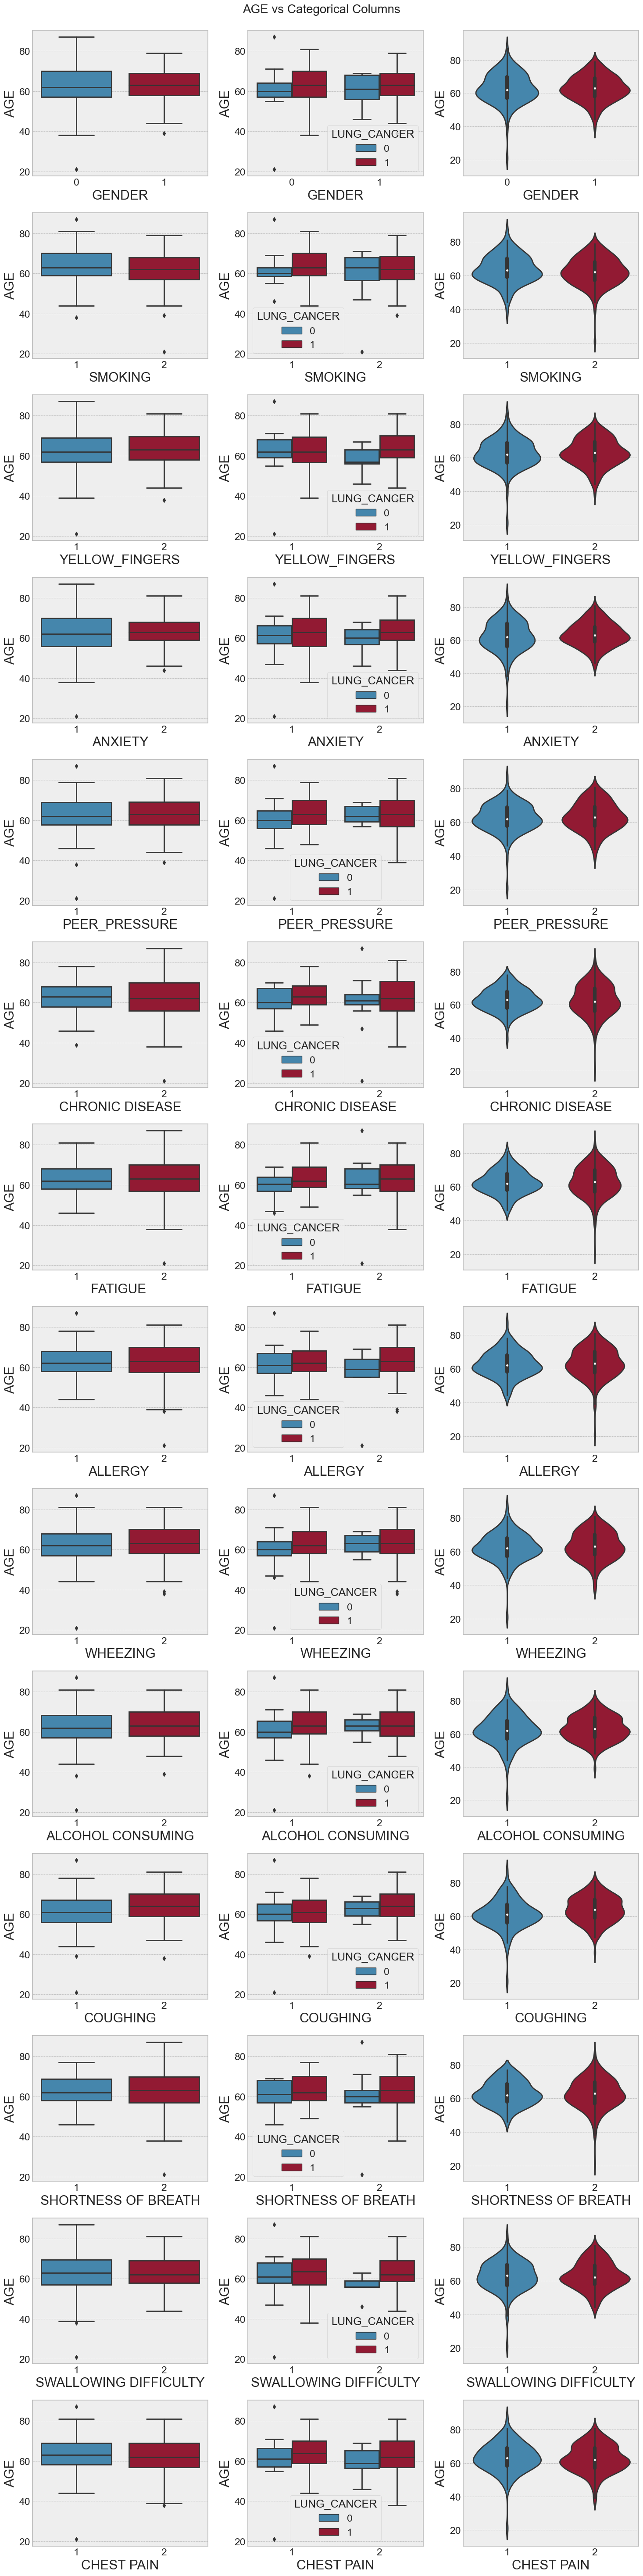

In [498]:
fig,ax = plt.subplots(14,3,figsize=(15,60))
for index,i in enumerate(cat_cols[:-1]):
    sns.boxplot(x=lungs[i],y=lungs['AGE'],ax=ax[index,0])
    sns.boxplot(x=lungs[i],y=lungs['AGE'],ax=ax[index,1],hue=lungs['LUNG_CANCER'])
    sns.violinplot(x=lungs[i],y=lungs['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.suptitle("AGE vs Categorical Columns",fontsize=20)
plt.show()

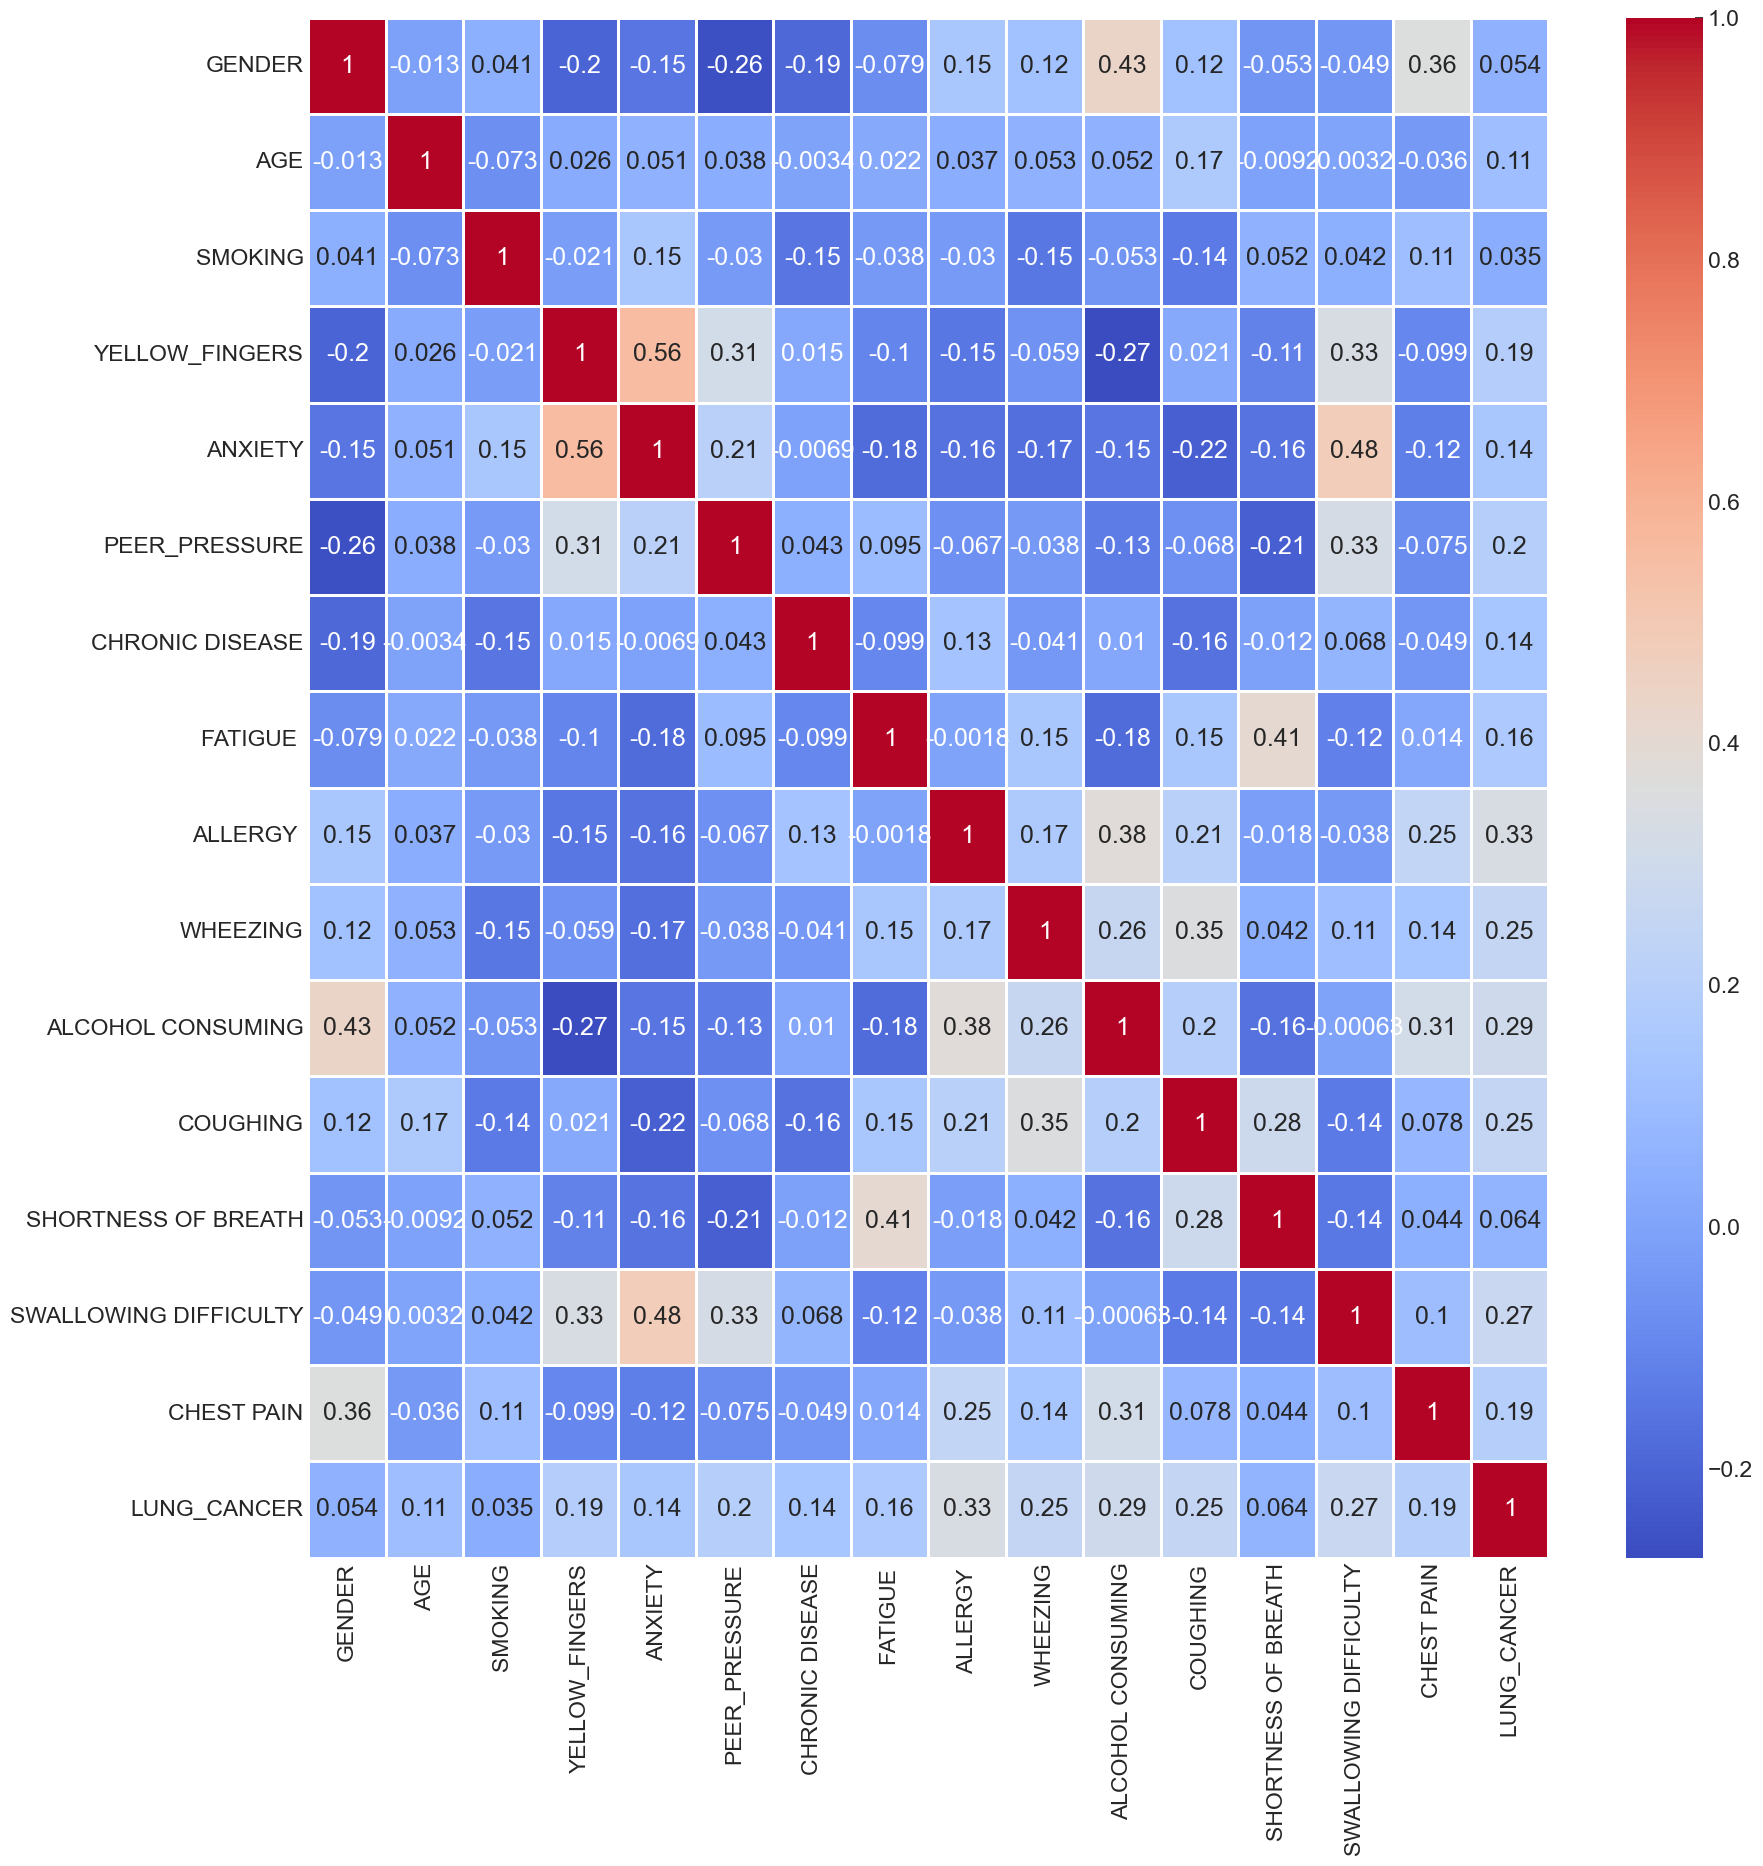

In [499]:
#Checking for multicollinearity in the dataset with the heat map

plt.figure(figsize = (20,20))
sns.heatmap(lungs.corr(), linewidths=0.9,annot=True,cmap='coolwarm');

There appears to be multicollinearity in the dataset. Its not so much but we can validate this claim if the model improves when features with high correlation are removed.

### Splitting

In [500]:
X = lungs.drop('LUNG_CANCER', axis =1 )
y = lungs['LUNG_CANCER']

In [501]:
print(f'The shape of the original dataset is {lungs.shape}')
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of the original dataset is (276, 16)
The shape of X is (276, 15)
The shape of y is (276,)


In [502]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)
print(f'X_train shape : {X_train.shape}\nX_Test shape: {X_test.shape} \ny_train shape : {y_train.shape}\ny_test shape: {y_test.shape}')

X_train shape : (207, 15)
X_Test shape: (69, 15) 
y_train shape : (207,)
y_test shape: (69,)


In [504]:
X_train.dtypes

GENDER                   int32
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
dtype: object

### Standardization

In [505]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [507]:
print(X_train.std())

1.0


### Modelling

In [531]:
model_results = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [532]:
model_results

,Model,Accuracy Score


In [533]:
#Testing various classifiers to see which gives the best accuracy score

models = [("Logistic Regression", LogisticRegression(random_state=101)), 
              ("Random Forest", RandomForestClassifier(random_state=101,n_estimators = 50)),
              ("LightGBM", LGBMClassifier(random_state=101,n_estimators = 50)),
              ("Support Vector Machines", SVC(random_state=101,gamma=1, C = 100,probability = True)),
              ("XGBoost", XGBClassifier(random_state=101, n_estimators = 100)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("CatBoost", CatBoostClassifier(verbose = False,random_state = 101,n_estimators =400 )),
              ("KNN", KNeighborsClassifier(n_neighbors=3)),
              ("Decision Tree", DecisionTreeClassifier(random_state=101  )),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators = 250), random_state=101)),
              ("Adaboost Classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state = 101,n_estimators =150 )),
              ("Gradient Boosting", GradientBoostingClassifier(random_state = 101,n_estimators = 250))]

In [534]:
from tqdm import tqdm

In [535]:
for clf_name, clf in tqdm(models):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    ypred_prob = clf.predict_proba(X_test)[:, 1]
    rocAuc_score = roc_auc_score(y_test, ypred_prob)
    
    new_row = {"Model": clf_name, "Accuracy Score": score, 'Roc_Auc_score':rocAuc_score}
    model_results = model_results.append(new_row, ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:08<00:00,  1.45it/s]


In [536]:
model_results.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score,Roc_Auc_score
6,Bernoulli Naive Bayes,0.942029,0.980508
0,Logistic Regression,0.927536,0.959322
1,Random Forest,0.927536,0.972881
4,XGBoost,0.927536,0.957627
8,KNN,0.927536,0.968644
10,Bagging Classifier,0.927536,0.988136
11,Adaboost Classifier,0.927536,0.957627
2,LightGBM,0.913043,0.962712
5,Gaussian Naive Bayes,0.913043,0.864407
7,CatBoost,0.898551,0.969492


As seen from google.com, Bernoulli Naive Bayes model usually perform well on small dataset and we have a small dataset in this research project.

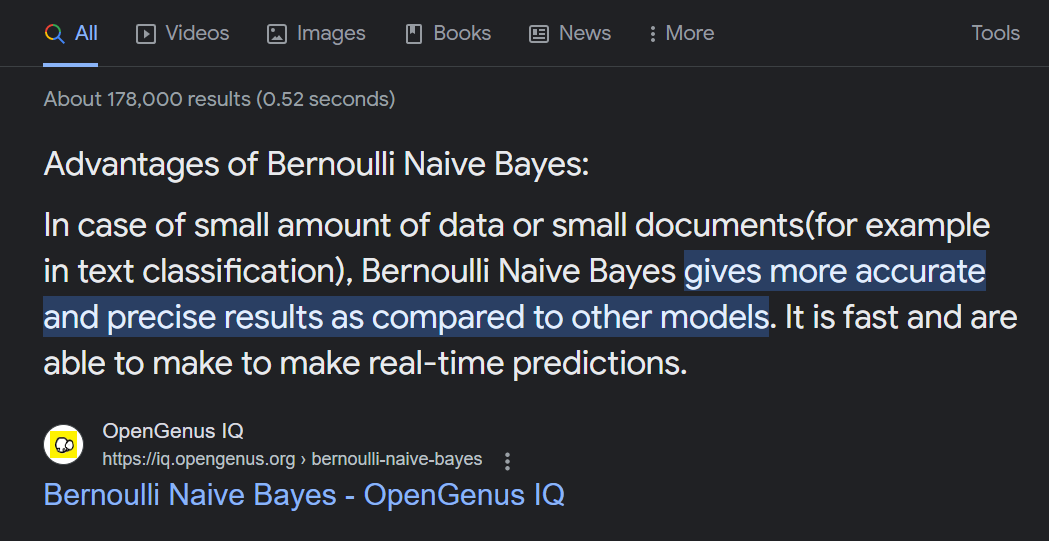

Let's investigate the top 3 best models from the dataframe shown above

In [ ]:
# It is desired that the curve is tilted towards the top left corner to have a good roc_auc_curve

def rocAuc_curve(model, model_name):
    '''
    A function that plots the area under the rate of characteristic curve
    '''
    ypred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresh = roc_curve(y_test, ypred_prob)
    
    rocAuc_score = roc_auc_score(y_test, ypred_prob)
    
    plt.figure(figsize=(5,5))
    #plotting roc_auc curve
    plt.plot(fpr, tpr, linestyle="--", color="limegreen", label="ROC AUC Score: (%0.5f)" % rocAuc_score)
    #plotting a diagonal line
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    
    plt.title(f"{model_name} ROC Curve", size=10)
    plt.xlabel("False Positive Rate", size = 10)
    plt.ylabel("True Positive Rate", size = 10)
    plt.legend(loc="lower right", prop={"size": 10})
    plt.show()

## Analyzing the Bernoulli Naive Bayes

In [ ]:
bnb =  BernoulliNB()
bnb.fit(X_train, y_train)
predictions = bnb.predict(X_test)

In [ ]:
print(f'The classification report of the model is\n')
print(classification_report(y_test,predictions))

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=bnb.classes_)
disp.plot(ax = ax)
plt.suptitle("Confusion Matrix of the Bernoulli Naive Bayes")
plt.show()

In [ ]:
rocAuc_curve(bnb, 'Bernoulli Naive Bayes')

## Analyzing the Bagging Classifier

In [ ]:
bc =  BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators = 50), random_state=101)
bc.fit(X_train, y_train)
predictions = bc.predict(X_test)

In [ ]:
print(f'The classification report of the model is\n')
print(classification_report(y_test,predictions))

In [ ]:
#It gave similar results as that of Bernoulli

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=bc.classes_)
disp.plot(ax = ax)
plt.suptitle("Confusion Matrix of the Bagging Classifier")
plt.show()

In [ ]:
# The model was able to predict the data most times as seen from the confusion matrix

In [ ]:
rocAuc_curve(bc, 'Bagging Classifier')

## Analyzing the Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [ ]:
print(f'The classification report of the model is\n')
print(classification_report(y_test,predictions))

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
disp.plot(ax = ax)
plt.suptitle("Confusion Matrix of the Logistic Regression")
plt.show()

In [ ]:
rocAuc_curve(lr, 'Logistic Regression')

### Answering the research questions

In [ ]:
# perform permutation importance
results = permutation_importance(bnb, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
col = X.columns.tolist()
for i,v in enumerate(importance):
    print(f'{col[i]} : {v}')

In [ ]:
# plot feature importance
plt.figure(figsize = (8,3))
plt.bar(col, importance,color = 'magenta')
plt.xticks(rotation = 90)
plt.show()

##### Answer to question 1

From the above feature importance plot, the highest determining factor is 'CHRONIC DISEASE' while the smallest determining factor is 'GENDER'.

This means that if someone is diagnosed of a chronic disease, it is a huge factor in determining if the patient has lung cancer or not. 

Also, we can see that gender contributes less i.e being a male or a female does not necessarily have any impact on the presence of lung cancer.

#### Answer to question 2

In [ ]:
age_min = lungs['AGE'].min()
age_max = lungs['AGE'].max()
print(f'Minimum age = {age_min} , Maximum age = {age_max}')

In [ ]:
for age in range(age_min,age_max+1):
    x_val = [[1,age,1,2,1,2,2,1,2,1,2,1,1,1,2]]
    x_val_scaled = scaler.transform(x_val)
    cancer_predicted = bnb.predict(x_val_scaled)
    if cancer_predicted == 1:
        print(f'The mininum age that could have cancer if all five determining factors are true is {age}')
        break

It appears that this age '21' is the minimum age that both genders could have a risk of having lung cancer if all the top 5 determining factors are true.